In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
file_path = "C:\\Users\\jeleo\\Downloads\\happiness_score_dataset.csv"
df = pd.read_csv(file_path)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.isnull().head(50)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
for i in  df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [7]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [8]:

numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

print('\n')
object_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        object_col.append(i)
print("Object Columns: ", object_col)


Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


Object Columns:  ['Country', 'Region']


In [9]:
# checking the uniqueness of the target variable 
df["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [17]:
#Dropping the Happiness Rank Column
df.drop(["Happiness Rank"], axis =1, inplace = True)

In [18]:
df

,Country,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Desciption of Dataset

In [19]:
df.describe()

,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The mean is slightly higher than the median(50%) on the Happiness Score column, Trust column and Generosity. 
This means the Data is skewed to the right in these columns.

 Dystopia Residual most likely has a normal distribution 
  
While, the other columns Economy, Family, Health and Freedom Column  are skewed to the left because the median is greater than the mean. 

The is a little difference between the  75% and the max which indicates there might be  some  outliers 

In [20]:

new_df = df.rename(columns={'Trust (Government Corruption)': 'Trust', 'Health (Life Expectancy)': 'Health', 'Economy (GDP per Capita)': 'Economy'}, inplace=True)
new_df=  df.iloc[:, 2:]
new_df

,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


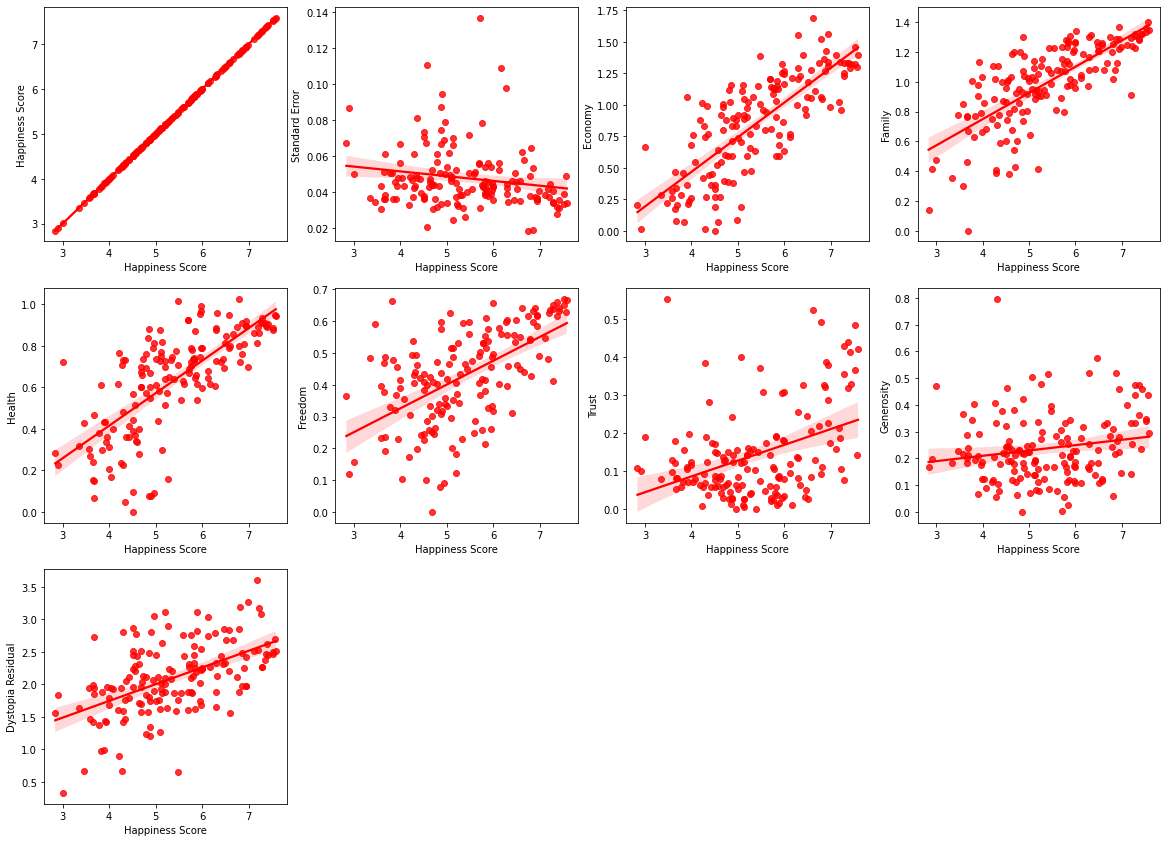

In [21]:


#Plot a linear graph to  determine the relationshipof the independent varaible  with the target Virable Happiness Score
plt.figure(figsize=(20,25))
p=1
for i in new_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.regplot(x='Happiness Score',y=i,data=new_df,color = 'r')
        plt.xlabel('Happiness Score')
        plt.ylabel(i)
    p+=1
    
plt.show()

The Happiness Score has a positive  relationship with the Health, Freedom, Economy, Family, Trust and Dystopia but its not a strong relationship 
While the rest columns are slightly negative 

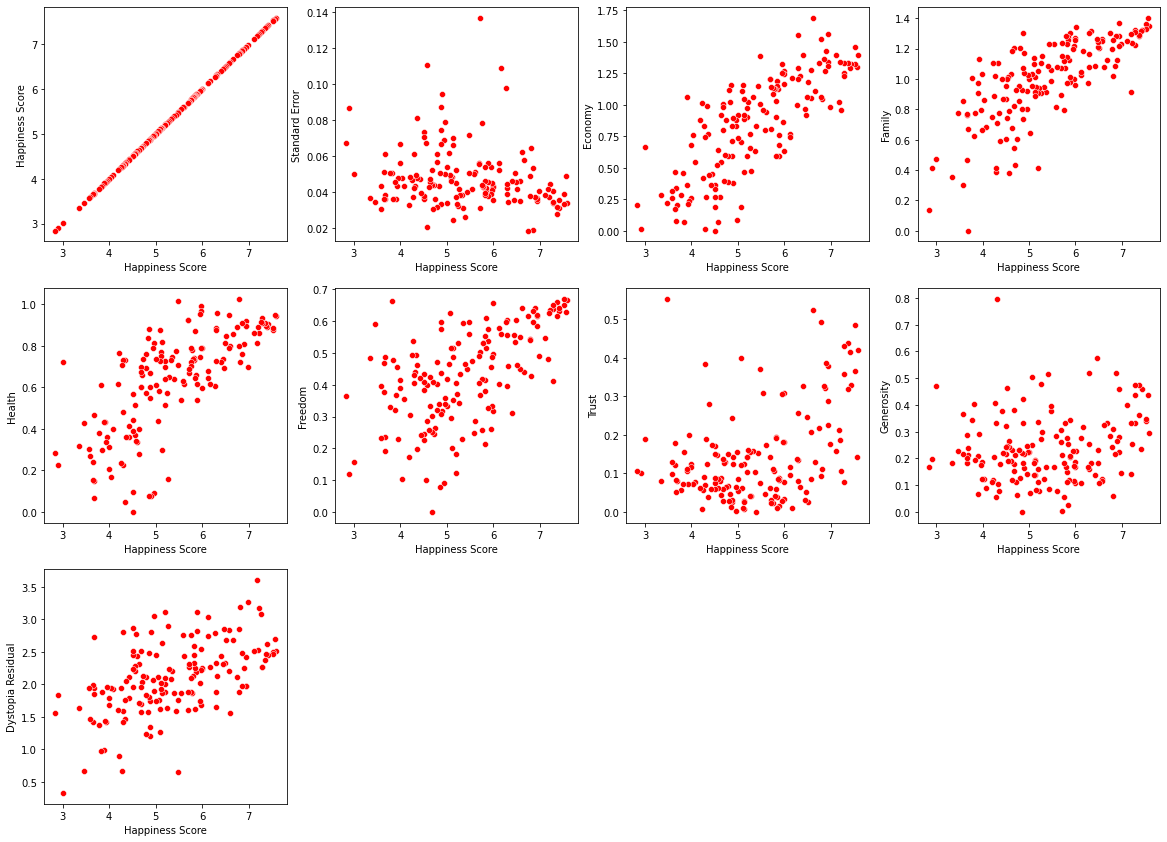

In [22]:
plt.figure(figsize=(20,25))
p=1
for i in new_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Happiness Score',y=i,data=new_df,color = 'r')
        plt.xlabel('Happiness Score')
        plt.ylabel(i)
    p+=1
    
plt.show()

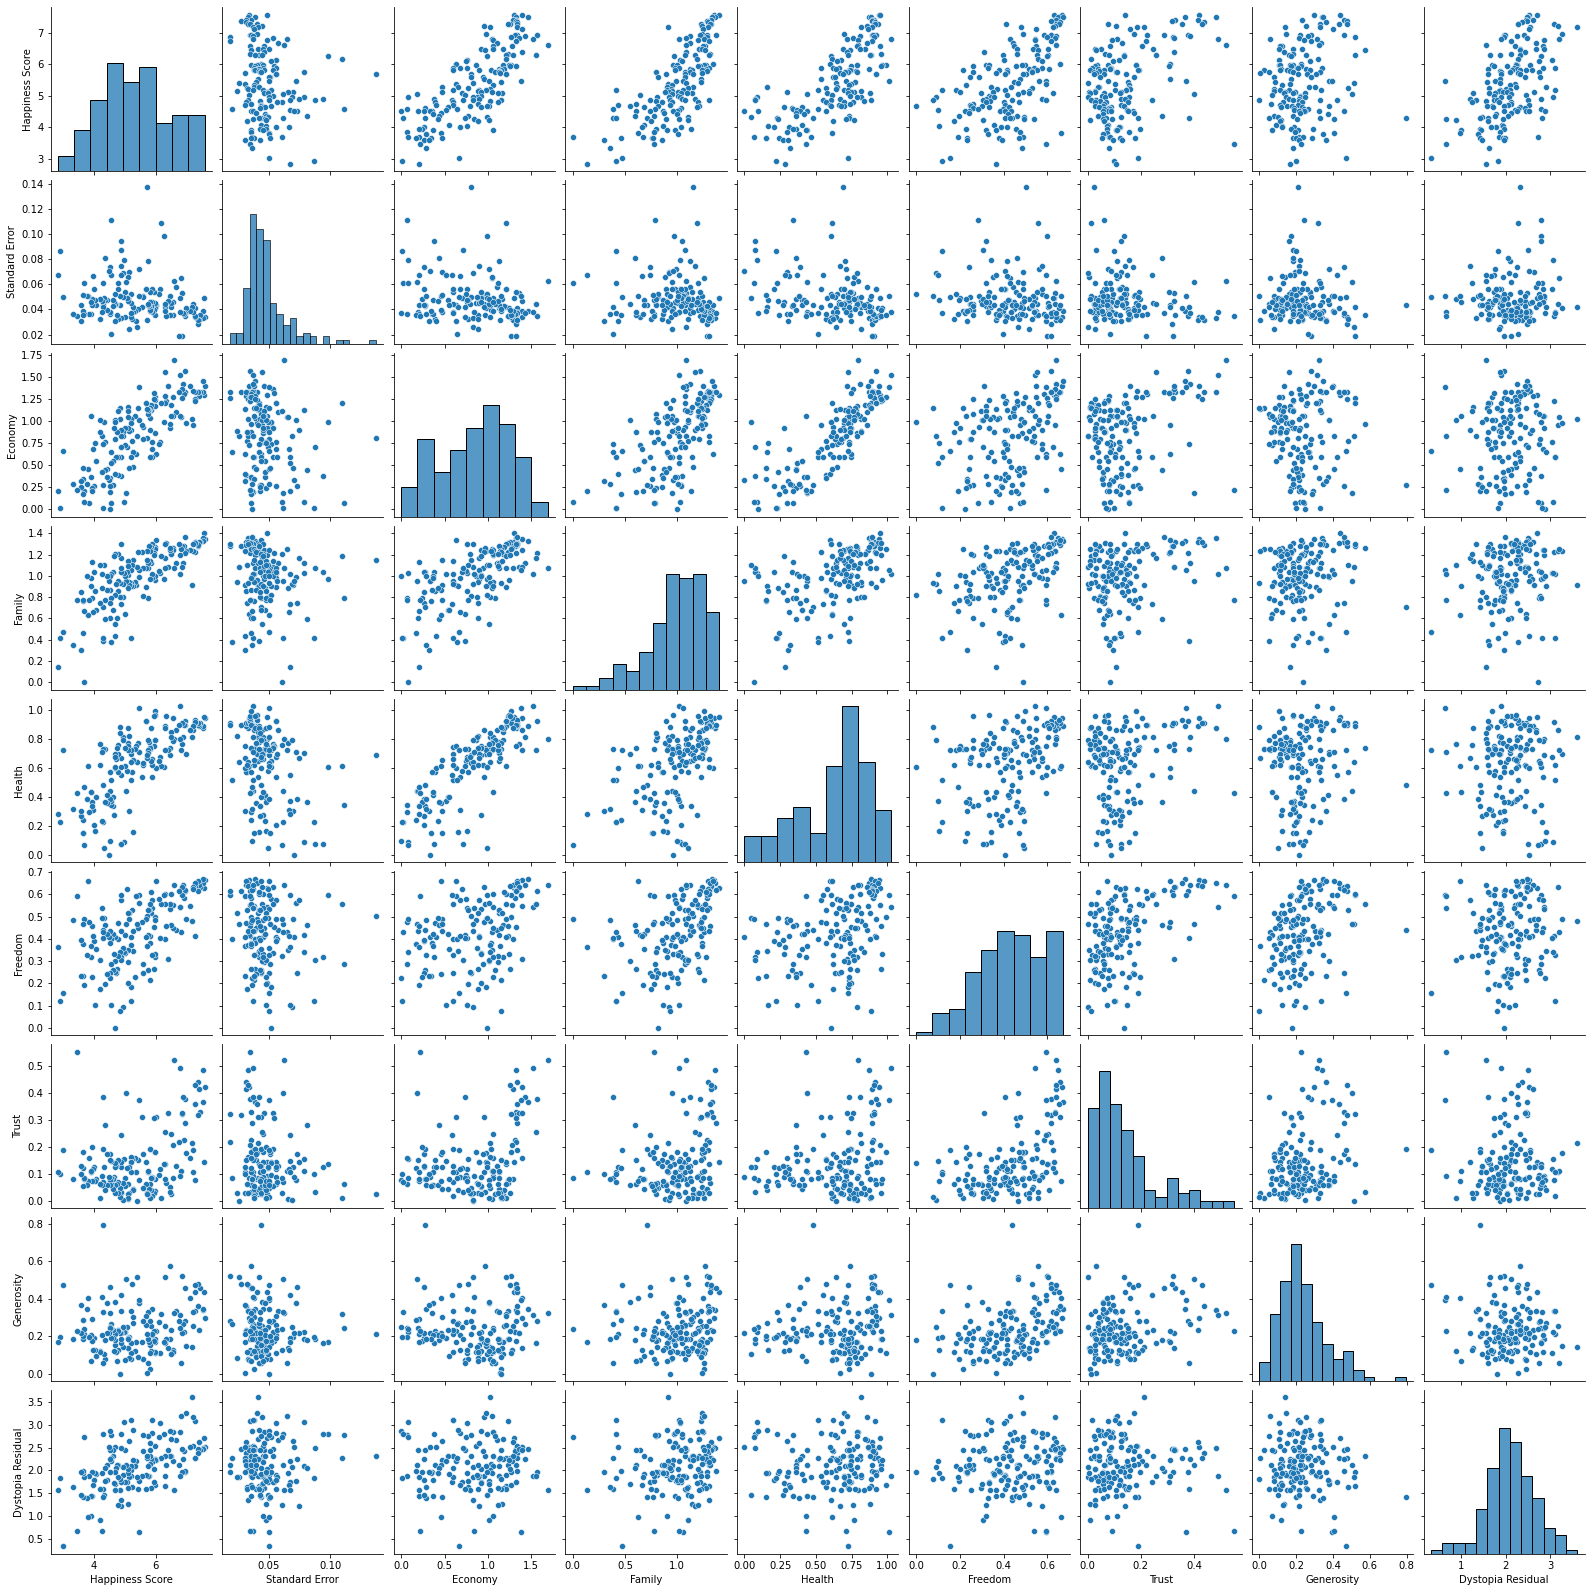

In [23]:
sns.pairplot(data=df,palette = 'Dark2')

Checking for Outliers

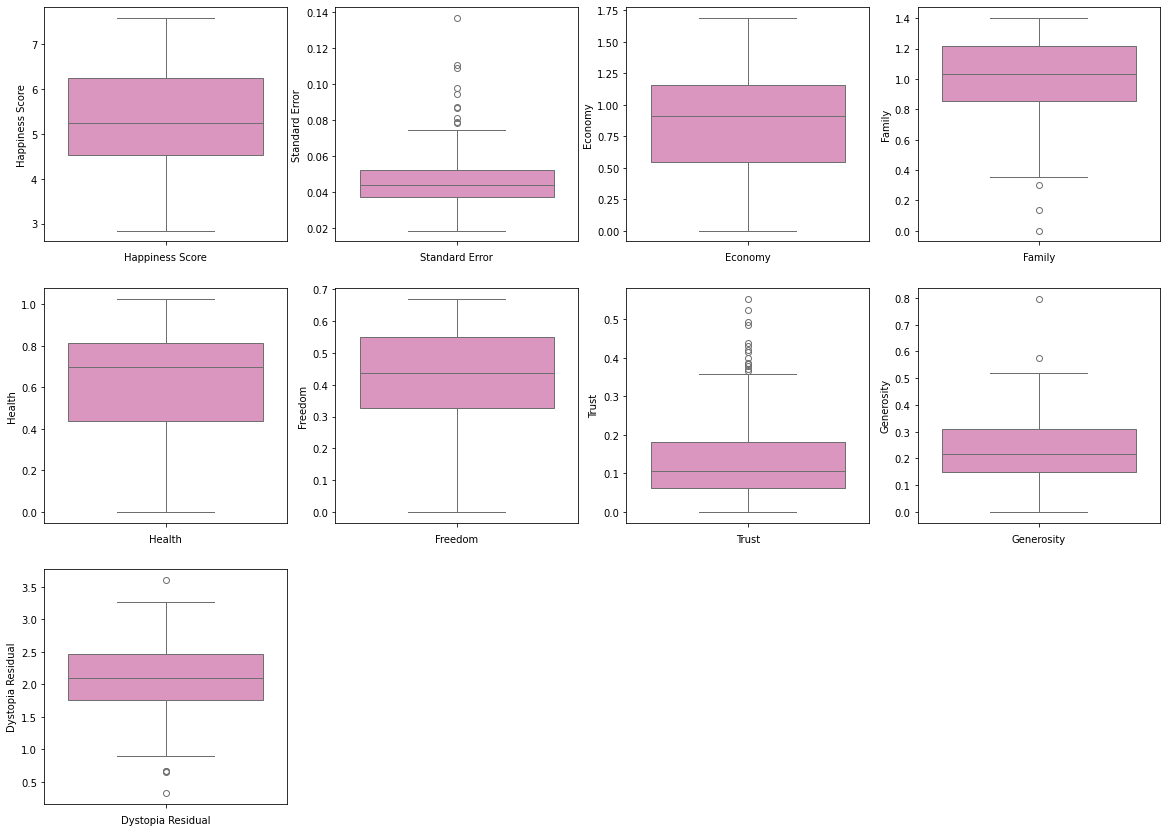

In [28]:

plt.figure(figsize= (20,25))
p=1
for i in new_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = 'Set2_r')
        plt.xlabel(i)
    
    p+=1
    
plt.show()

The Boxplot shows that there are outliers present in Standard Error,Family, Generosity,Dystopia Residual, Trust Government, Dystopia Residual



Removing the Outliers

In [29]:
outliers_features = df[['Standard Error', 'Family','Trust', 'Generosity' , 'Dystopia Residual']]
z= np.abs(zscore(outliers_features))
z

,Standard Error,Family,Trust,Generosity,Dystopia Residual
0,0.805926,1.320281,2.309652,0.471040,0.758258
1,0.055889,1.514458,0.016480,1.575856,1.092857
2,0.854487,1.361054,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.555725,1.748563,0.639337
...,...,...,...,...,...
153,0.774917,0.800520,3.413922,0.087228,2.588925
154,0.662582,2.346860,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.381419,1.856891,3.208430
156,2.263962,2.118467,0.357715,0.316950,0.481985


In [31]:
#threshold = 3
np.where(z>3)


(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([2, 0, 0, 0, 3, 1, 2, 4, 1], dtype=int64))

In [32]:
z.iloc[128,3]

4.423261580434631

In [44]:
new_df1 =new_df[(z<3).all(axis = 1)]
new_df1


,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [45]:
print("Old Data Frame- ", new_df.shape[0])
print ("New Data Frame- ", new_df1.shape[0])

Old Data Frame-  158
New Data Frame-  149


In [46]:
print("Data Loss Percentage- ", ((new_df.shape[0]-new_df1.shape[0])/new_df.shape[0])*100)

Data Loss Percentage-  5.69620253164557


check with IQR 

In [48]:
#1st quantile
Q1 = outliers_features.quantile(0.25)

#3rd quantile
Q3 = outliers_features.quantile(0.75)

#IQR
IQR =Q3-Q1


new_df2 = new_df[~((new_df<(Q1-1.5 * IQR)) |(new_df>(Q3 + 1.5*IQR))).any(axis=1)]
new_df2.shape

(126, 9)

In [49]:
print("Data Loss Percentage- ", ((new_df.shape[0]-new_df2.shape[0])/new_df.shape[0])*100)

Data Loss Percentage-  20.253164556962027


Z score has the least data  loss percentage  compare to IQR

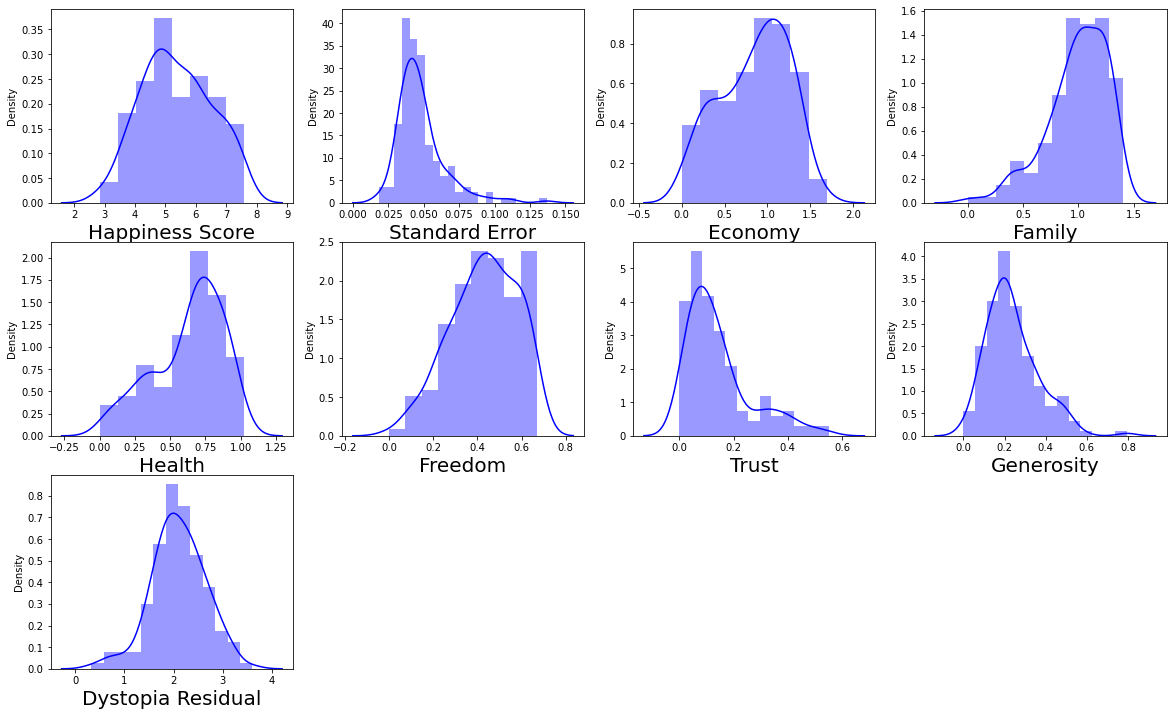

In [51]:
plt.figure(figsize= (20,25))
plotnumber = 1

for column in new_df:
    if plotnumber <=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()

 Dystopis Residual, Economy & Happiness Score  shows a  distribution that is a normal distribution curve

Standard Error and Trust shows a  distribution that is skewed to the right 

family appears to be skewed to the  left  

In [53]:
new_df.skew()

Happiness Score      0.097769
Standard Error       1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

In [58]:
#Removing skewness using cuberoot method
new_df['Standard Error'] = np.cbrt(df['Standard Error'])
new_df['Trust'] = np.cbrt(df['Trust'])
new_df['Generosity'] = np.cbrt(df['Generosity'])
new_df.skew()



Happiness Score      0.097769
Standard Error       0.979748
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                0.011932
Generosity          -0.961079
Dystopia Residual   -0.238911
dtype: float64

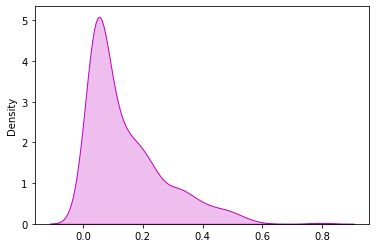

In [64]:

df_columns = ['Generosity', 'Trust', 'Standard Error']

# Create a distribution plot for the selected columns
sns.distplot(df[df_columns], color='m', kde_kws={"shade": True}, hist=False)

# Show the plot
plt.show()

In [65]:
#Determing the correlation 
new_df.corr()

,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
Happiness Score,1.000000,-0.201754,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,-0.201754,1.000000,-0.224064,-0.132005,-0.321062,-0.159027,-0.158530,-0.054081,0.063299
Economy,0.780966,-0.224064,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,0.740605,-0.132005,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
Health,0.724200,-0.321062,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,0.568211,-0.159027,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
Trust,0.326229,-0.158530,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769
Generosity,0.159029,-0.054081,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000,-0.061511
Dystopia Residual,0.530474,0.063299,0.040059,0.148117,0.018979,0.062783,0.010769,-0.061511,1.000000


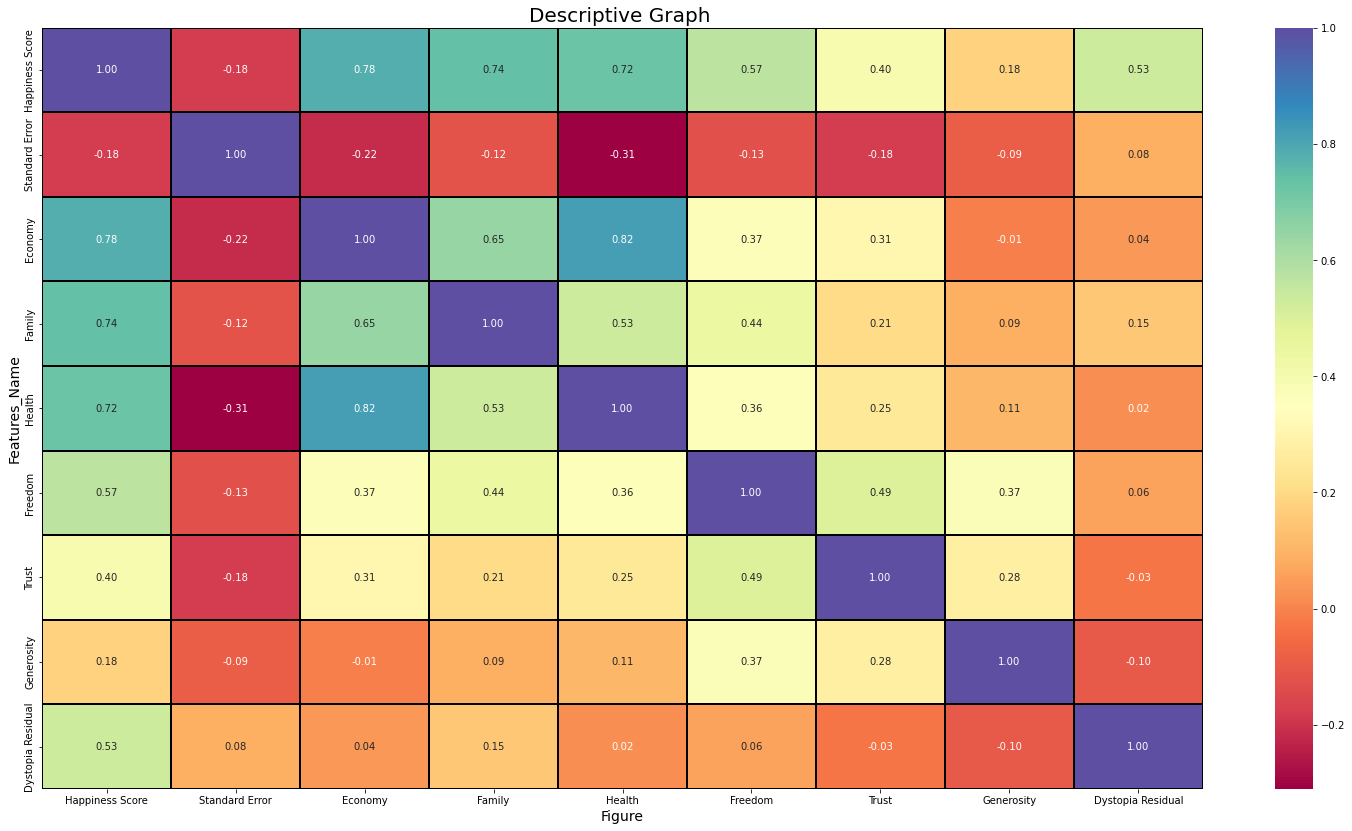

In [66]:
plt.figure(figsize = (26,14))
sns.heatmap(df.corr(),annot = True,fmt ='0.2f',linewidth=0.2,linecolor='black', cmap='Spectral')
plt.xlabel('Figure',fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph ',fontsize =20)
plt.show()

This heatmap contains both positive and negative correlation


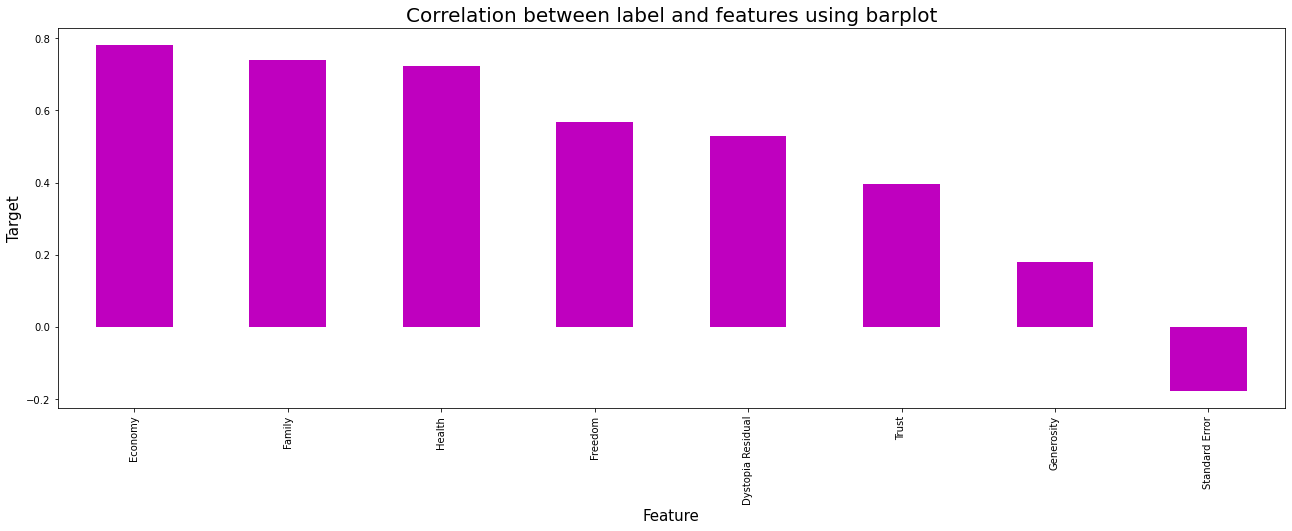

In [73]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending= False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot',fontsize=20)
plt.show()

This Bar chat shows a  strong positive Correlation  between Economy, Family and Health,


Medium correlation between Freedom , Dystopia Residual and Trust


Least correlation between Generosity and Standard Error


In [75]:
x= new_df1.drop("Happiness Score", axis=1)
y= new_df1["Happiness Score"]

print("Feature Dimension=", x.shape)
print("Label Dimension", y.shape)

Feature Dimension= (149, 8)
Label Dimension (149,)


In [77]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


In [79]:
# VIF for each scaled column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]= x.columns
vif

,VIF values,Features
0,1.168812,Standard Error
1,4.200848,Economy
2,1.930975,Family
3,3.427562,Health
4,1.861044,Freedom
5,1.470350,Trust
6,1.340286,Generosity
7,1.034747,Dystopia Residual


The Economy feature is high but it has an effect on the Happiness score

In [80]:
#Importing  Libary 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

first get the best random state

In [82]:
maxAccu =0 
maxRS = 0
for i in range(1,450):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS =i
print("Maximum r2 score is ", maxAccu," on Random_state ", maxRS)

Maximum r2 score is  0.9999999540741656  on Random_state  299


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30, random_state = maxRS)

In [87]:
#Importing the Modelling libaries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR


In [90]:
# Define a list of models
models = [
    LinearRegression(),
    Lasso(),
    GradientBoostingRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    SVR(),
    ExtraTreesRegressor(),
]

# Iterate through the list of models
for model in models:
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(x_test)

    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Print the model's performance metrics
    print(f'Model: {type(model).__name__}')
    print('R2_score:', r2)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('\n')

Model: LinearRegression
R2_score: 0.9999999540741656
Mean Absolute Error: 0.00021190799399876977
Mean Squared Error: 6.55558979922589e-08
Root Mean Squared Error: 0.0002560388603166693


Model: Lasso
R2_score: -0.025050905842430193
Mean Absolute Error: 1.042573717948718
Mean Squared Error: 1.4631880632252632
Root Mean Squared Error: 1.2096231079246391


Model: GradientBoostingRegressor
R2_score: 0.9597094079966915
Mean Absolute Error: 0.19757193391988678
Mean Squared Error: 0.05751198593505023
Root Mean Squared Error: 0.23981656726558787


Model: Ridge
R2_score: 0.9999525867172303
Mean Absolute Error: 0.006959271910742713
Mean Squared Error: 6.767912597470594e-05
Root Mean Squared Error: 0.008226732399604714


Model: DecisionTreeRegressor
R2_score: 0.8157640913105352
Mean Absolute Error: 0.419888888888889
Mean Squared Error: 0.26298379999999993
Root Mean Squared Error: 0.5128194614091786


Model: SVR
R2_score: 0.9583364585973144
Mean Absolute Error: 0.16914147671686347
Mean Squared Err

In [91]:
from sklearn.model_selection import cross_val_score

In [99]:
# Define a list of models
models = [
    LinearRegression(),
    Lasso(),
    GradientBoostingRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    SVR(),
    ExtraTreesRegressor(),
]

# Perform cross-validation for each model
for model in models:
    # Use cross_val_score to get scores for each fold
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')

    # Calculate R2 score on the test data
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    r2 = r2_score(y_test, pred_model)

    # Print the model's cross-validated performance
    print(f'Model: {type(model).__name__}')
    print('Cross-validated R2 score:', scores.mean())
    print("Difference between R2 score and cross-validation score is:", (r2 - scores.mean()) * 100)
    print('\n')

Model: LinearRegression
Cross-validated R2 score: 0.9999981234686345
Difference between R2 score and cross-validation score is: 0.00018306055311612113


Model: Lasso
Cross-validated R2 score: -23.099531692553747
Difference between R2 score and cross-validation score is: 2307.4480786711315


Model: GradientBoostingRegressor
Cross-validated R2 score: -2.4162716108207234
Difference between R2 score and cross-validation score is: 337.21693359095


Model: Ridge
Cross-validated R2 score: 0.9984242986241231
Difference between R2 score and cross-validation score is: 0.1528288093107233


Model: DecisionTreeRegressor
Cross-validated R2 score: -7.477630051145418
Difference between R2 score and cross-validation score is: 828.5246272575456


Model: SVR
Cross-validated R2 score: -3.427599420198027
Difference between R2 score and cross-validation score is: 438.59358787953414


Model: ExtraTreesRegressor
Cross-validated R2 score: -2.9947058231654102
Difference between R2 score and cross-validation sco

from the difference of both R2 score and cross validation score computed on R2 score we can conclude that  the Linear Regression is  our best fitting and best performing mode

In [103]:
from sklearn.model_selection import GridSearchCV

In [105]:
param={'alpha': [1.0,0.05,.4,2],'fit_intercept': [True,False],
      'solver':['auto', 'svd','cholesky','lsqr','sag','saga','lbfgd'],
       'positive': [False, True],
       'random_state': [1,4,10,20]
     
      }
gscv= GridSearchCV(LinearRegression(),param,cv=5)
gscv.fit(x_train,y_train)LR

SyntaxError: invalid syntax (4036368228.py, line 8)

In [106]:

param = {
    'alpha': [1.0, 0.05, 0.4, 2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

gscv = GridSearchCV(LinearRegression(), param, cv=5)
gscv.fit(x_train, y_train)

ValueError: Invalid parameter alpha for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.